In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler


## Загрузим dataset

In [2]:
data= pd.read_csv('Cust_Segmentation.csv')
data

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2
...,...,...,...,...,...,...,...,...,...,...
845,846,27,1,5,26,0.548,1.220,NaN,NBA007,6.8
846,847,28,2,7,34,0.359,2.021,0.0,NBA002,7.0
847,848,25,4,0,18,2.802,3.210,1.0,NBA001,33.4
848,849,32,1,12,28,0.116,0.696,0.0,NBA012,2.9


## Провидем Разведовочный анализ данных (EDA)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Edu              850 non-null    int64  
 3   Years Employed   850 non-null    int64  
 4   Income           850 non-null    int64  
 5   Card Debt        850 non-null    float64
 6   Other Debt       850 non-null    float64
 7   Defaulted        700 non-null    float64
 8   Address          850 non-null    object 
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 66.5+ KB


In [4]:
data.describe()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,850.00000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000,850.000000
mean,425.50000,35.029412,1.710588,8.565882,46.675294,1.576820,3.078773,0.261429,10.171647
std,245.51816,8.041432,0.927784,6.777884,38.543054,2.125843,3.398799,0.439727,6.719441
min,1.00000,20.000000,1.000000,0.000000,13.000000,0.012000,0.046000,0.000000,0.100000
25%,213.25000,29.000000,1.000000,3.000000,24.000000,0.382500,1.045750,0.000000,5.100000
50%,425.50000,34.000000,1.000000,7.000000,35.000000,0.885000,2.003000,0.000000,8.700000
75%,637.75000,41.000000,2.000000,13.000000,55.750000,1.898500,3.903250,1.000000,13.800000
max,850.00000,56.000000,5.000000,33.000000,446.000000,20.561000,35.197000,1.000000,41.300000


In [5]:
data.drop('Address',axis = 1,inplace=True) # удаляем категорийный признак.


In [6]:
data

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2
...,...,...,...,...,...,...,...,...,...
845,846,27,1,5,26,0.548,1.220,NaN,6.8
846,847,28,2,7,34,0.359,2.021,0.0,7.0
847,848,25,4,0,18,2.802,3.210,1.0,33.4
848,849,32,1,12,28,0.116,0.696,0.0,2.9


In [7]:
data.drop(['Defaulted','Customer Id'],axis= 1,inplace=True)
data

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,6.3
1,47,1,26,100,4.582,8.218,12.8
2,33,2,10,57,6.111,5.802,20.9
3,29,2,4,19,0.681,0.516,6.3
4,47,1,31,253,9.308,8.908,7.2
...,...,...,...,...,...,...,...
845,27,1,5,26,0.548,1.220,6.8
846,28,2,7,34,0.359,2.021,7.0
847,25,4,0,18,2.802,3.210,33.4
848,32,1,12,28,0.116,0.696,2.9


In [8]:
data.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,6.3
1,47,1,26,100,4.582,8.218,12.8
2,33,2,10,57,6.111,5.802,20.9
3,29,2,4,19,0.681,0.516,6.3
4,47,1,31,253,9.308,8.908,7.2


In [9]:
data.isnull().sum() # Проверим пустые значения

Age                0
Edu                0
Years Employed     0
Income             0
Card Debt          0
Other Debt         0
DebtIncomeRatio    0
dtype: int64

## Стандартизация данных
Стандартизация данных — это распространенная техника для предварительной
обработки и анализа данных. Данные преобразуют так, чтобы их среднее значение
было равно нулю, а стандартное отклонение — единице.
Преобразование может быть полезно по разным причинам: для повышения
эффективности моделей машинного обучения, сравнения данных в разных
масштабах или обеспечения нормального распределения данных.
Процесс стандартизации включает вычитание среднего значения и деление на
стандартное отклонение.

In [86]:
scaler= data.values[:]
X = StandardScaler().fit_transform(scaler)
X


array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.57652509, -0.54673283],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
         0.39138677,  1.88637138],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.59755385, -0.54673283],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         3.45892281, -0.54673283],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -1.08281745, -0.54673283],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.2340332 ,  1.88637138]])

## kmeans

In [87]:
from sklearn.cluster import KMeans
num_klaz = []

for i in range(1, 4):
    kmeans = KMeans(n_clusters= i, init="k-means++", random_state = 42)
    kmeans.fit(scaler)

    num_klaz.append(kmeans.inertia_)

c:\Users\Roman33\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Roman33\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\Roman33\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Roman33\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when t

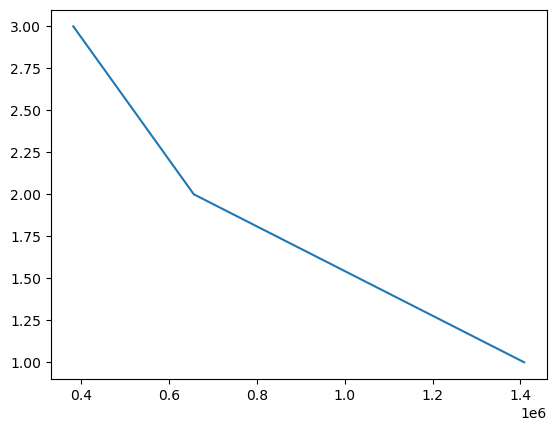

In [88]:
plt.plot(num_klaz,range(1,4))

In [94]:
kmeans = KMeans(n_clusters=3,init = 'k-means++',  random_state= 42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
centers = kmeans.cluster_centers_



c:\Users\Roman33\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Roman33\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


### Построение графика кластирезации :

C:\Users\Roman33\AppData\Local\Temp\ipykernel_9868\3597116315.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 30, c = 'red', cmap='viridis', label = 'Cluster 1')
C:\Users\Roman33\AppData\Local\Temp\ipykernel_9868\3597116315.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 30, c = 'blue', cmap='viridis', label = 'Cluster 2')
C:\Users\Roman33\AppData\Local\Temp\ipykernel_9868\3597116315.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 30, c = 'yellow', cmap='viridis', label = 'Cluster 3')


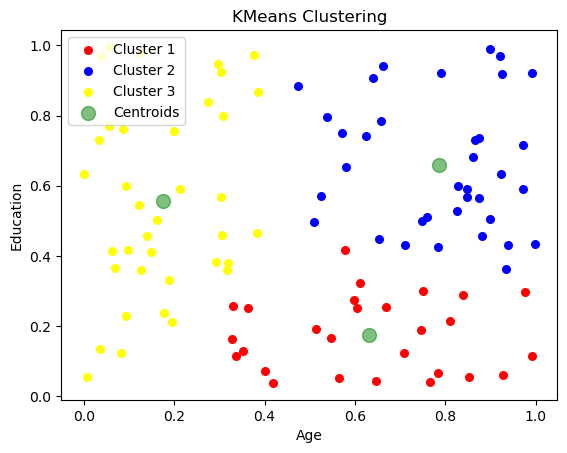

In [99]:
import matplotlib.pyplot as plt

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 30, c = 'red', cmap='viridis', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 30, c = 'blue', cmap='viridis', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 30, c = 'yellow', cmap='viridis', label = 'Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, alpha=0.5, c = 'green', label = 'Centroids')

plt.title('KMeans Clustering')
plt.xlabel('Age')
plt.ylabel('Education')
plt.legend()
plt.show()


In [93]:
lab= kmeans.labels_
data['Clustering'] = lab # Добавим в Dataset столбец с №Кластера
data

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio,Clustering
0,41,2,6,19,0.124,1.073,6.3,0
1,47,1,26,100,4.582,8.218,12.8,1
2,33,2,10,57,6.111,5.802,20.9,0
3,29,2,4,19,0.681,0.516,6.3,0
4,47,1,31,253,9.308,8.908,7.2,2
...,...,...,...,...,...,...,...,...
845,27,1,5,26,0.548,1.220,6.8,0
846,28,2,7,34,0.359,2.021,7.0,0
847,25,4,0,18,2.802,3.210,33.4,0
848,32,1,12,28,0.116,0.696,2.9,0


<Axes: xlabel='Income', ylabel='Clustering'>

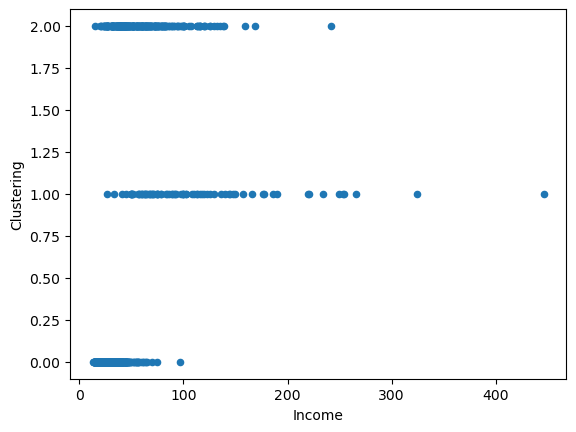

In [70]:
data.plot.scatter(x='Income', y='Clustering')